In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
# 1.构造数据

In [5]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)



(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


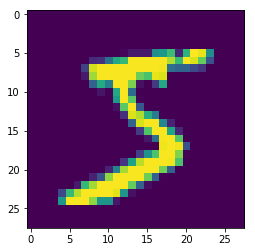

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()


In [8]:

x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))



In [9]:
# 2.构造网络

In [10]:
model = keras.Sequential()



In [11]:
#卷积层
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))



In [12]:
# 池化层

In [13]:
model.add(layers.MaxPool2D(pool_size=(2,2)))


In [14]:
# 全连接层

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# 分类层
model.add(layers.Dense(10, activation='softmax'))


In [16]:
# 3.模型配置

In [17]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 4.模型训练

In [19]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


W0711 07:22:06.775903 140404520732416 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 114us/sample - loss: 1.2835 - accuracy: 0.8659 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 2/5
54000/54000 [==============================] - 5s 88us/sample - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 3/5
54000/54000 [==============================] - 5s 86us/sample - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0758 - val_accuracy: 0.9808
Epoch 4/5
54000/54000 [==============================] - 5s 85us/sample - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 5/5
54000/54000 [==============================] - 4s 83us/sample - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0799 - val_accuracy: 0.9813


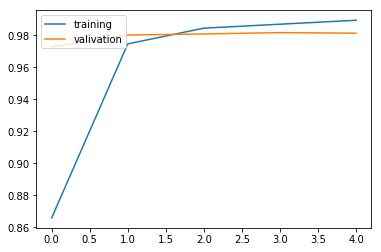

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()


In [21]:
res = model.evaluate(x_test, y_test)



10000/10000 [==============================] - 1s 68us/sample - loss: 0.0876 - accuracy: 0.9796
